# **Context / Problem Statement:**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

# **Objective:**

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

# **Data Description:**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

# **Data Dictionary:**

Sl_No: Primary key of the records.

Customer Key: Customer identification number.

Average Credit Limit: Average credit limit of each customer for all credit cards.

Total credit cards: Total number of credit cards possessed by the customer.

Total visits bank: Total number of visits that the customer made (yearly) personally to the bank.

Total visits online: Total number of visits or online logins made by the customer (yearly).

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# **Importing the Libraries:**

To do our Exploratory Data Analysis and Visualize the data, we import the necessary libraries:

In [5]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform PCA
from sklearn.decomposition import PCA


# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [6]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Credit Card Customer Data.xlsx'
df = pd.read_excel(file_path)
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
df.shape

(660, 7)

In [ ]:
df.copy()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [10]:
# copying the data to another variable to avoid any changes to original data
df_copy = df.copy()
display(df_copy.head())

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [11]:
# Dropping the 'Customer Key' column as it is a unique identifier and not useful for clustering
df_copy = df_copy.drop('Customer Key', axis=1)

# Display the first few rows of the modified DataFrame
display(df_copy.head())

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,100000,2,1,1,0
1,2,50000,3,0,10,9
2,3,50000,7,1,3,4
3,4,30000,5,1,1,4
4,5,100000,6,0,12,3


In [12]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


## Check for duplicate rows

### Subtask:
Identify and handle any duplicate entries in the dataset.


In [13]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If duplicates exist, remove them
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

# Print the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of DataFrame after removing duplicates: (660, 7)


## Check data types and missing values



In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


# **Overview of the Data Set:**

The initial steps to get an overview of any dataset is to:

observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.

To get information about the number of rows and columns in the dataset
find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

check the statistical summary of the dataset to get an overview of the numerical columns of the data



# **Basic EDA Observations:**

* The Data set has 660 Rows and 7 Columns.
* The max average of Credit Limit is 2,00,000
* The Mean Average of Credit Limit is  34574 approximately.
* The highest number of cards held by a customer is 10 and least is 1.
* There are no null values in the Data
* Duplicate values are not relevant in this data due to a small data set.

## Visualize the distribution of numerical features

Use histograms and box plots to understand the distribution and identify potential outliers in the numerical columns.


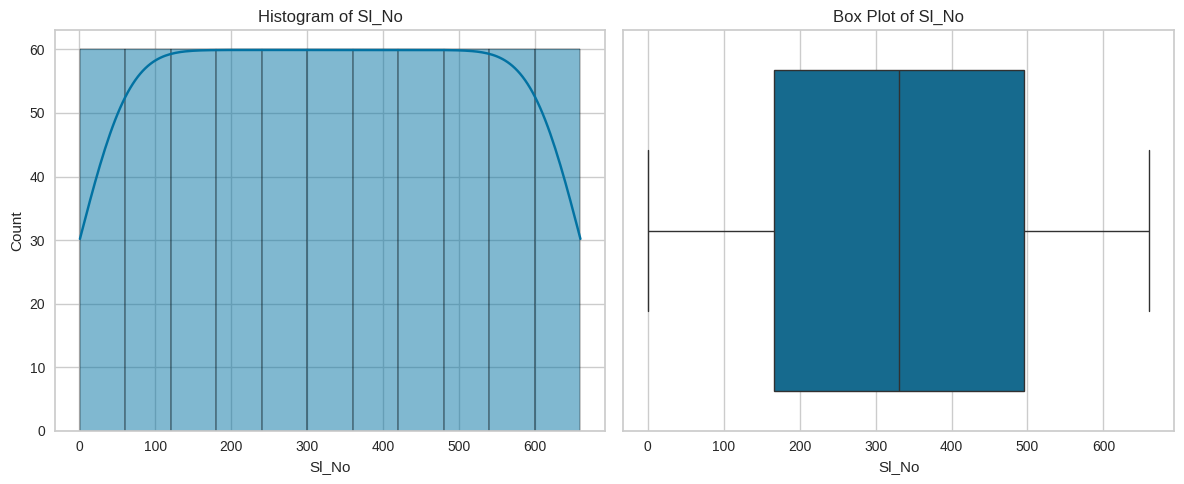

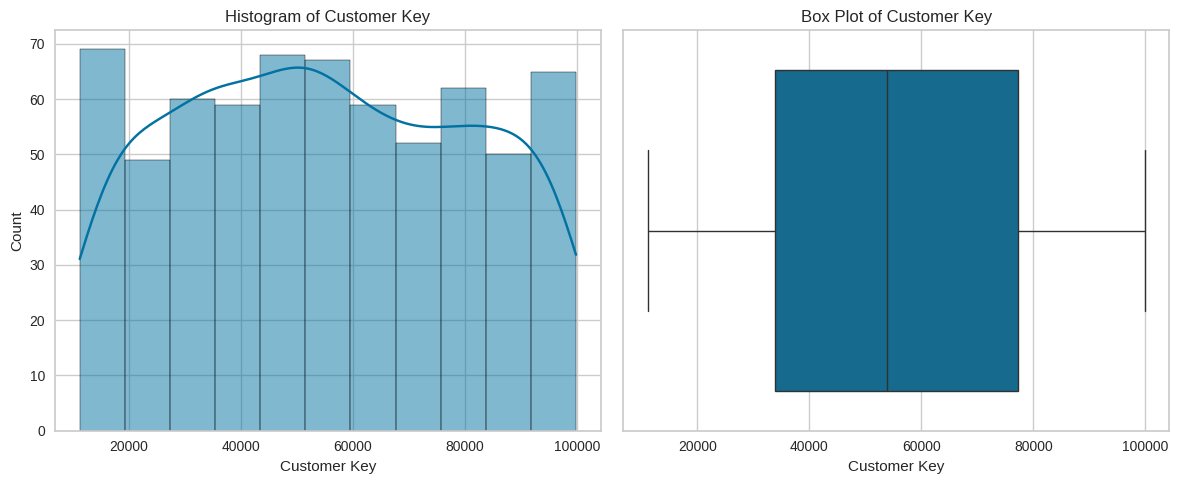

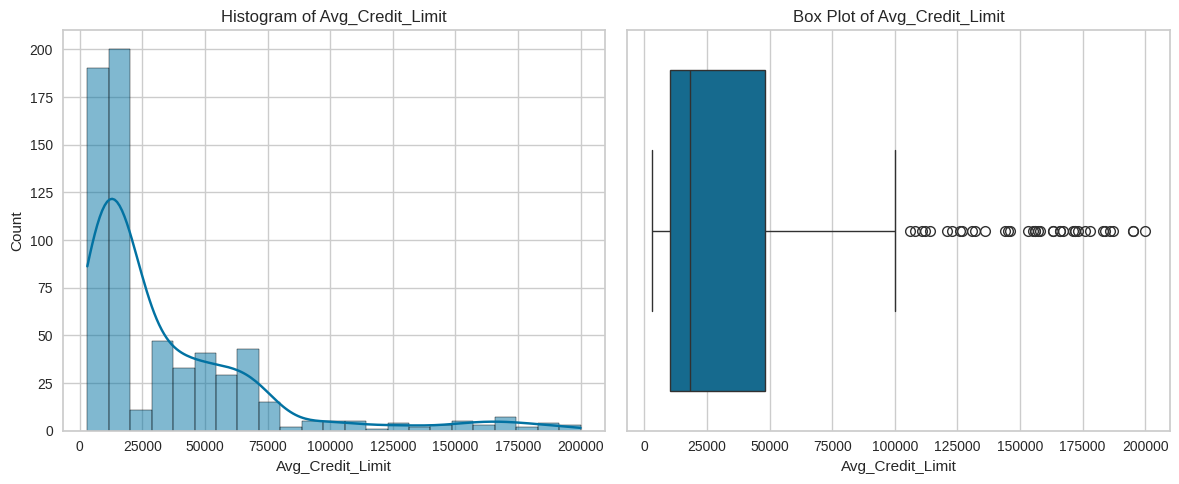

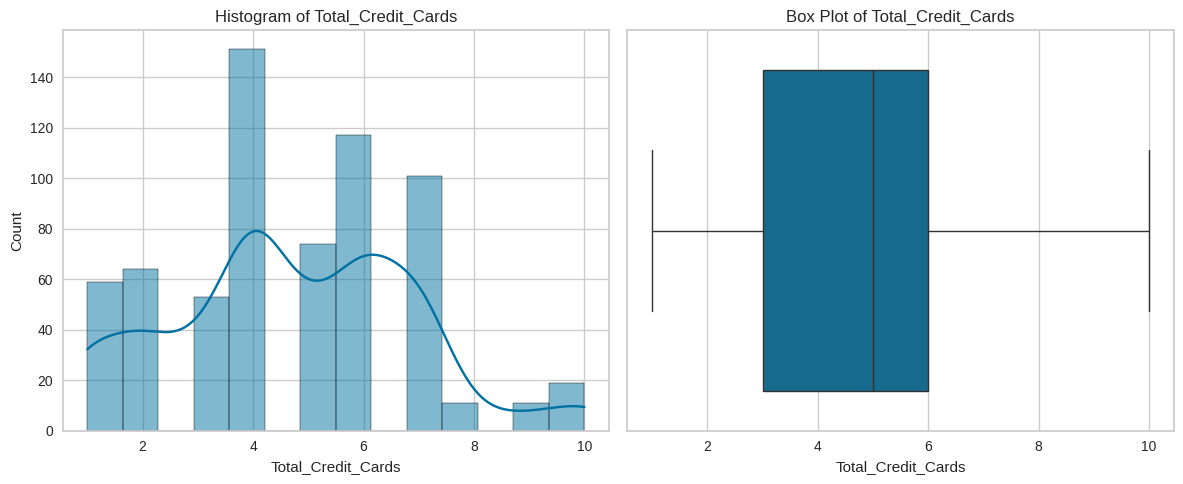

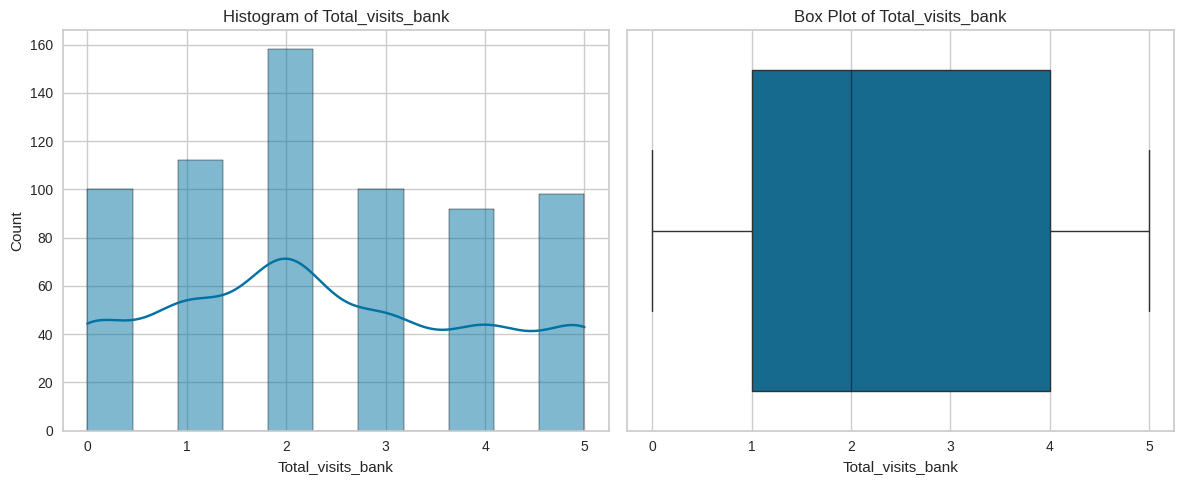

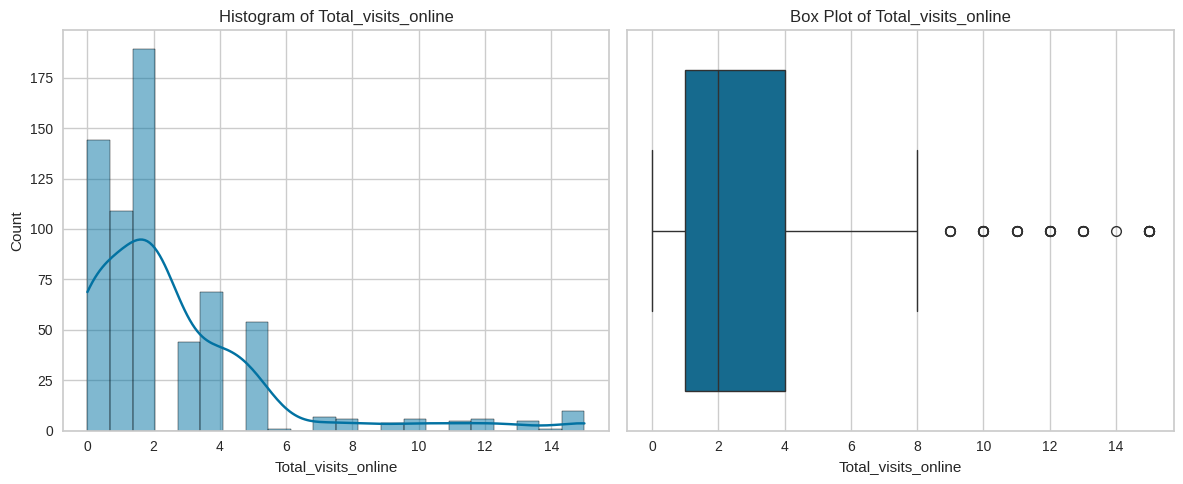

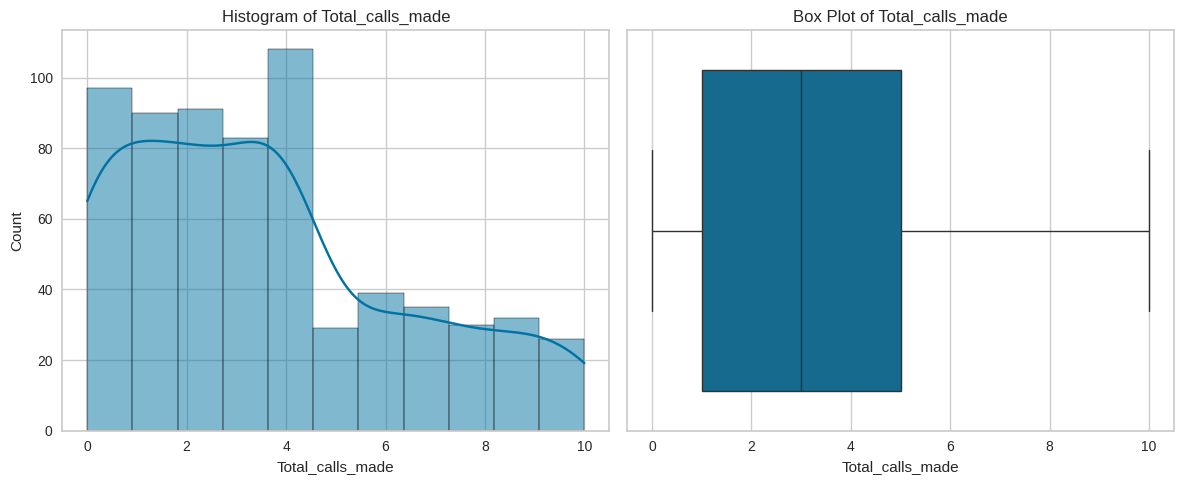

In [15]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

# **Summarizing the findings:**

Based on the distribution of the numerical features, we can observe the following:

Outliers are mostly observed in Calls Made online and Average Credit Limit.

This is reasonable because , while majority of the customers are comfortable with Visiting the Bank, frew customers tend to make online only .

Same applies to Average Credit Limit, Only few of the customers have high credit limits and tend to fall under Outlier.


## Analyze relationships between features

### Subtask:
Use scatter plots or pair plots to visualize the relationships between different numerical features.


**Reasoning**:
Select the numerical columns and create a pair plot to visualize the relationships between them.



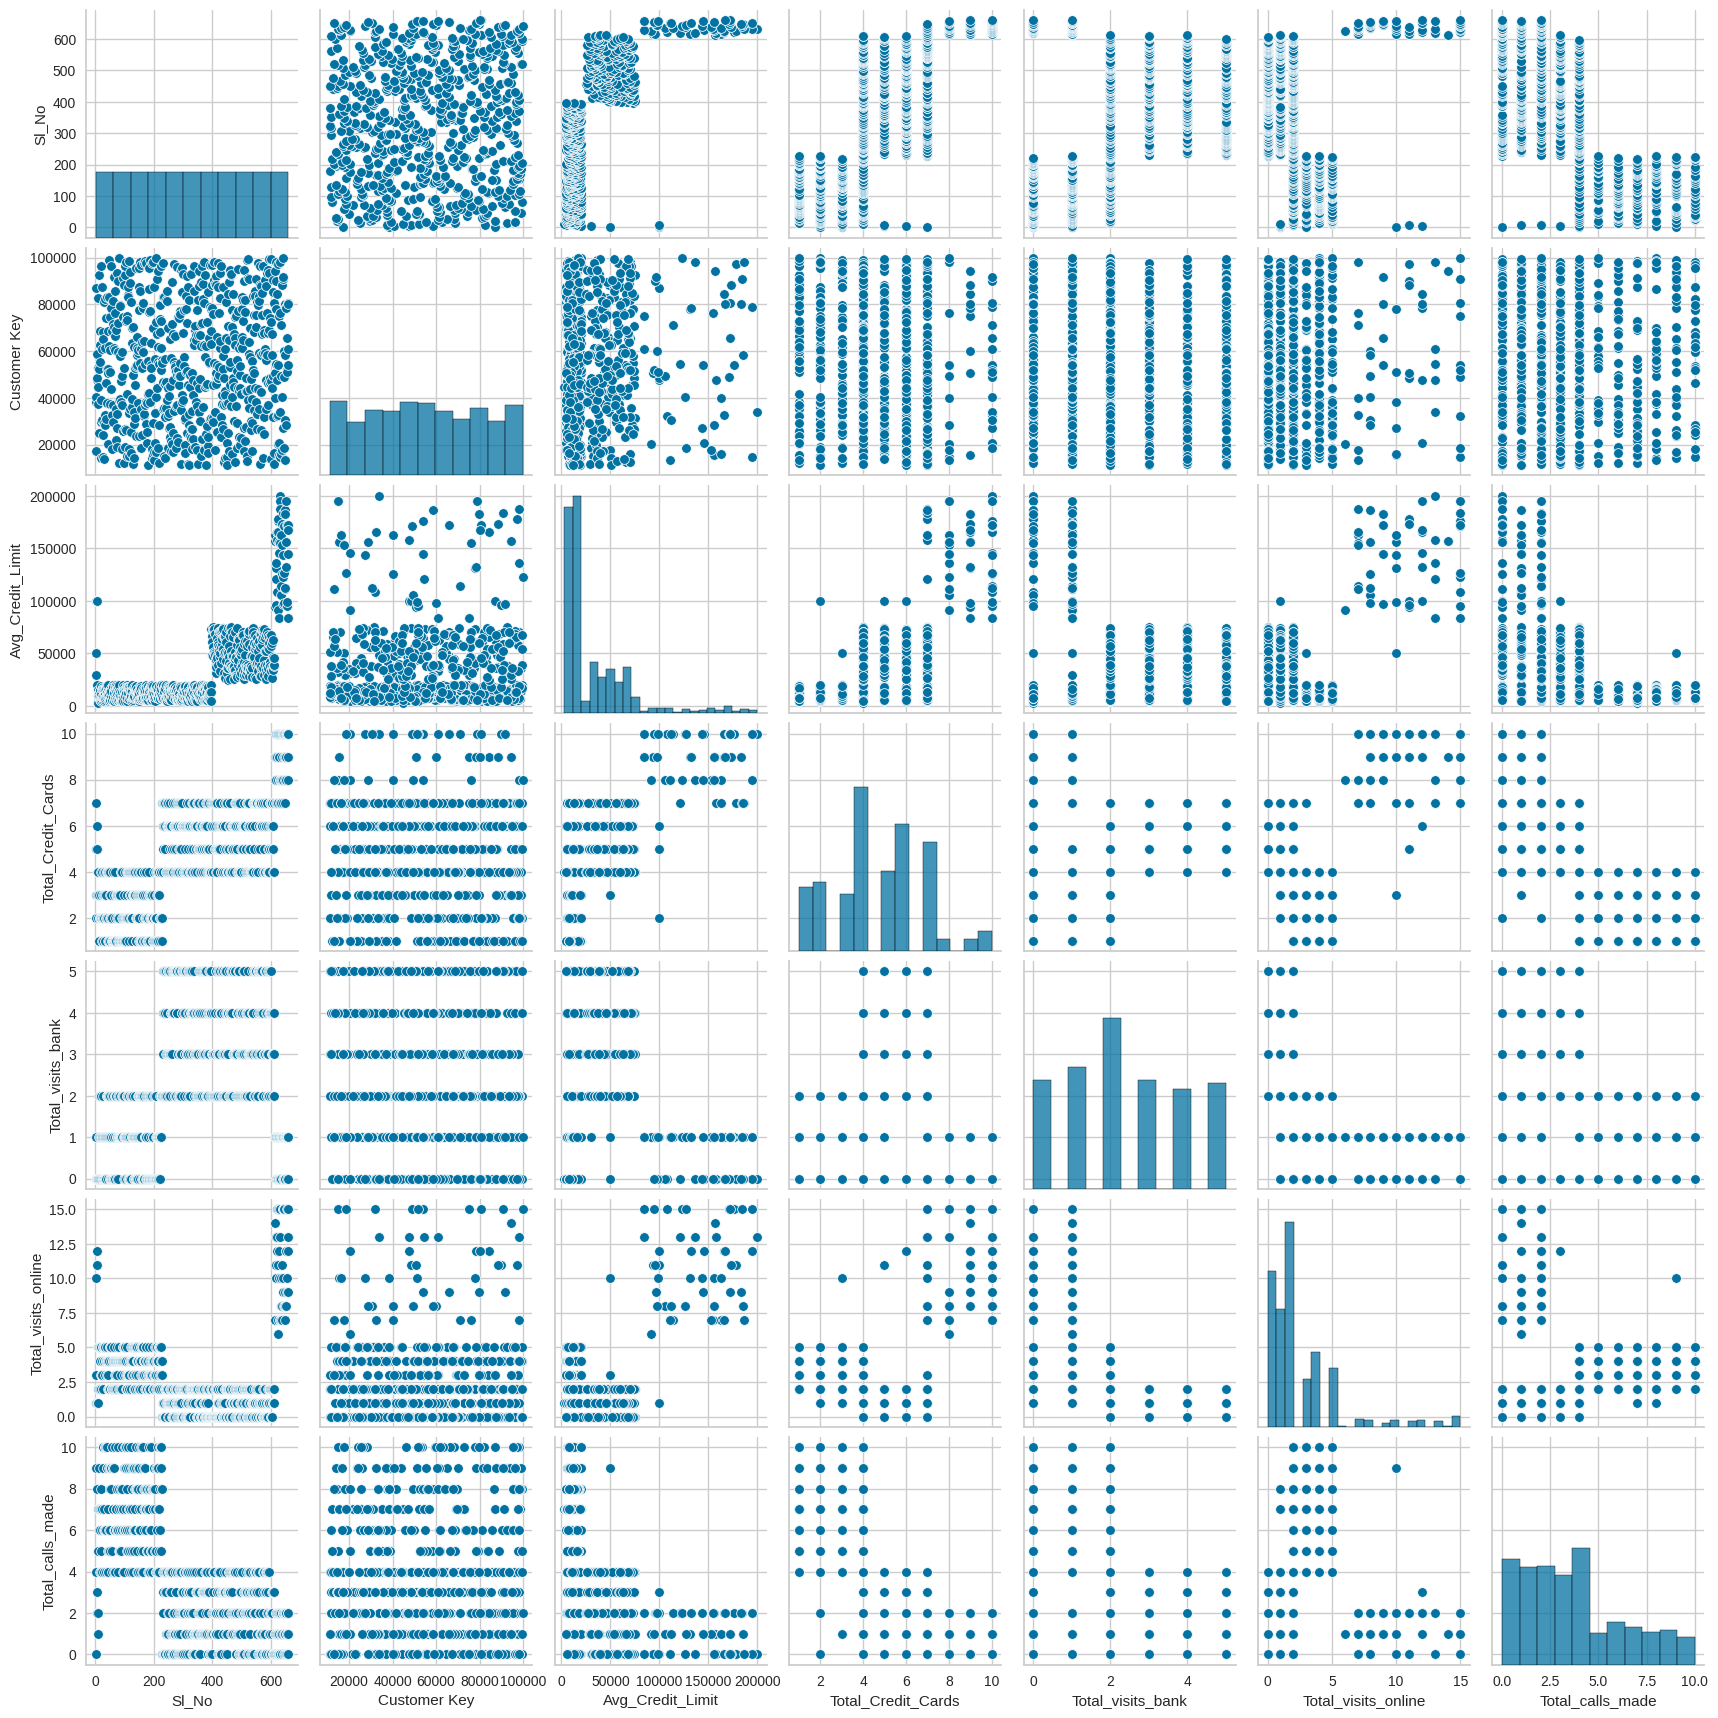

In [16]:
numerical_cols = df.select_dtypes(include=np.number).columns
sns.pairplot(df[numerical_cols])
plt.show()


### Insights or Next Steps

*   Proceed with further analysis or modeling, as the data is clean regarding duplicates and missing values.
*   Investigate the distributions of numerical features and potential outliers identified in the visualizations to determine if transformations or outlier handling are necessary.


# **Perform an Univariate Analysis to understand each Variable:**

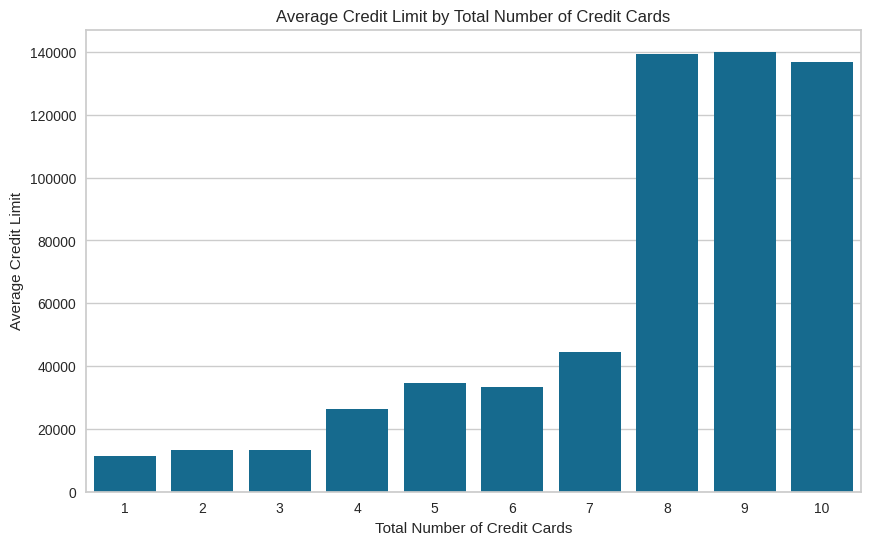

In [17]:
# Group by 'Total_Credit_Cards' and calculate the mean of 'Avg_Credit_Limit'
credit_limit_by_cards = df.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=credit_limit_by_cards)
plt.title('Average Credit Limit by Total Number of Credit Cards')
plt.xlabel('Total Number of Credit Cards')
plt.ylabel('Average Credit Limit')
plt.show()

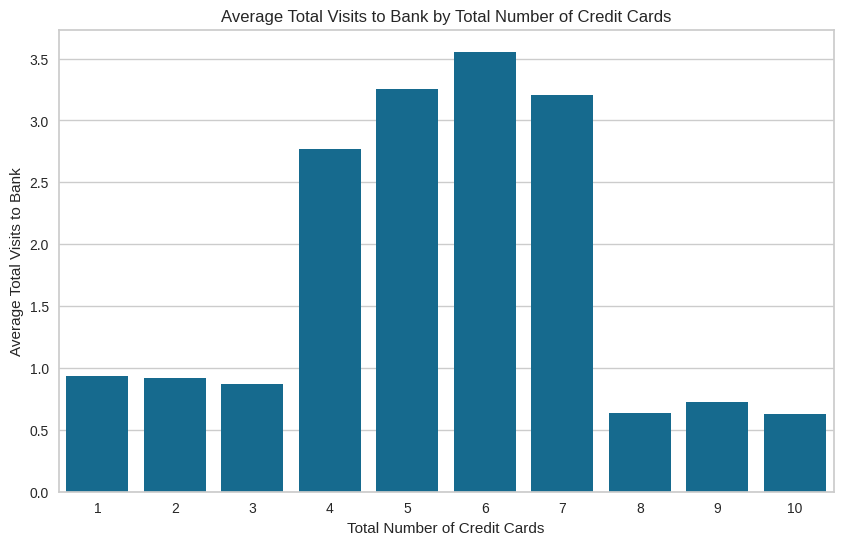

In [18]:
# Group by 'Total_Credit_Cards' and calculate the mean of 'Total_visits_bank'
visits_bank_by_cards = df.groupby('Total_Credit_Cards')['Total_visits_bank'].mean().reset_index()

# Create a bar chart for Total_visits_bank
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Credit_Cards', y='Total_visits_bank', data=visits_bank_by_cards)
plt.title('Average Total Visits to Bank by Total Number of Credit Cards')
plt.xlabel('Total Number of Credit Cards')
plt.ylabel('Average Total Visits to Bank')
plt.show()

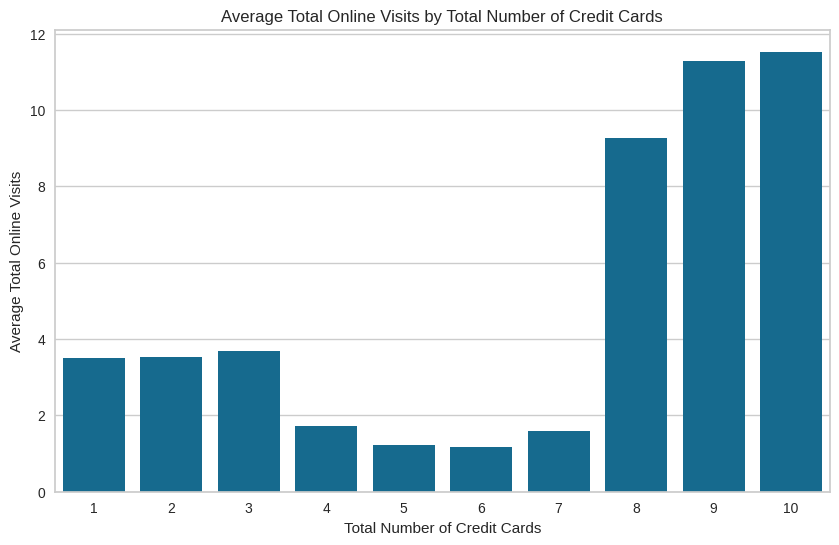

In [19]:
# Group by 'Total_Credit_Cards' and calculate the mean of 'Total_visits_online'
visits_online_by_cards = df.groupby('Total_Credit_Cards')['Total_visits_online'].mean().reset_index()

# Create a bar chart for Total_visits_online
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Credit_Cards', y='Total_visits_online', data=visits_online_by_cards)
plt.title('Average Total Online Visits by Total Number of Credit Cards')
plt.xlabel('Total Number of Credit Cards')
plt.ylabel('Average Total Online Visits')
plt.show()

# **Observations from Univariate Anaslysis:**

* Customers having more than 7 Credit Cards are having higher Credit Limit

* A cluster of customers having  4-7 Credit Cards, have higher percentage of visiting the Bank in person rather online.

* This may be their requirement for more or additional Credit cards.

* A cluster of customers who have more than 7 cards , show higher online interactions rather than visiting the bank, shows they are satisfied with number of cards they holf already



## Scale the data for K-Means clustering

### Subtask:
Scale the numerical features using StandardScaler.

In [20]:
# Drop 'Sl_No' column as it is not needed for clustering
df_scaled = df_copy.drop('Sl_No', axis=1)

# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Display the first few rows of the scaled data
display(df_scaled[:5])

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       [-0.12166518,  0.13569407, -0.86045063, -0.54748969,  0.1455276 ],
       [ 1.74018685,  0.59733368, -1.47373077,  3.20229822, -0.20373864]])

## Perform K-Means Clustering

### Subtask:
Perform K-Means clustering with the optimal number of clusters determined from the Elbow Method and Silhouette Analysis.

**Reasoning**:
Based on the Elbow Method and Silhouette Analysis, both 3 and 4 clusters seem reasonable. We will perform K-Means clustering with both options and analyze the resulting clusters to make a final decision on the optimal number of clusters.

## Determine the optimal number of clusters using the Elbow Method


Calculate and plot the sum of squared distances (inertia) for different numbers of clusters to identify the "elbow point".


The Elbow Method helps in finding the optimal number of clusters by plotting the sum of squared distances from each point to its assigned cluster center. The point where the decrease in inertia starts to level off (the "elbow") is often considered the optimal number of clusters.

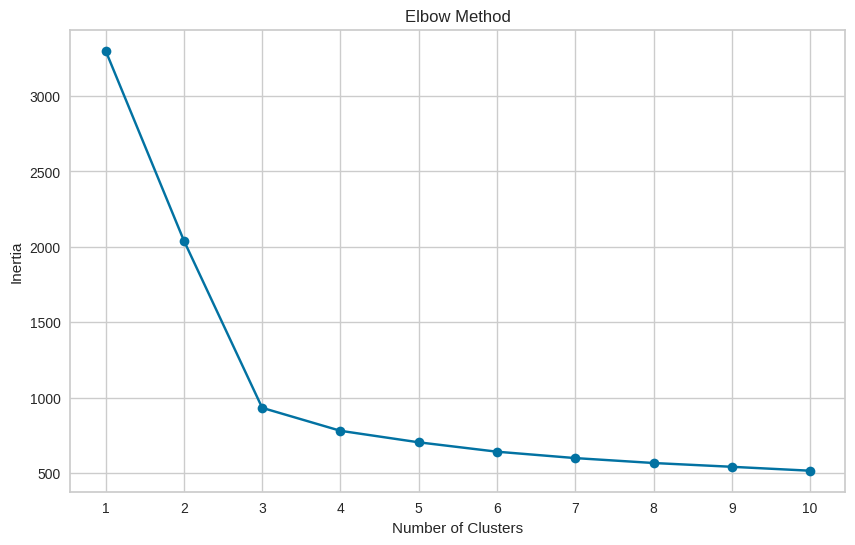

In [21]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Determine the optimal number of clusters using Silhouette Analysis

### Subtask:
Calculate and plot the silhouette scores for different numbers of clusters to evaluate the quality of the clustering.

**Reasoning**:
Silhouette analysis measures how well each point is clustered by calculating a silhouette coefficient. The average silhouette score across all points provides an overall measure of clustering quality. A higher average silhouette score generally indicates better-defined clusters.

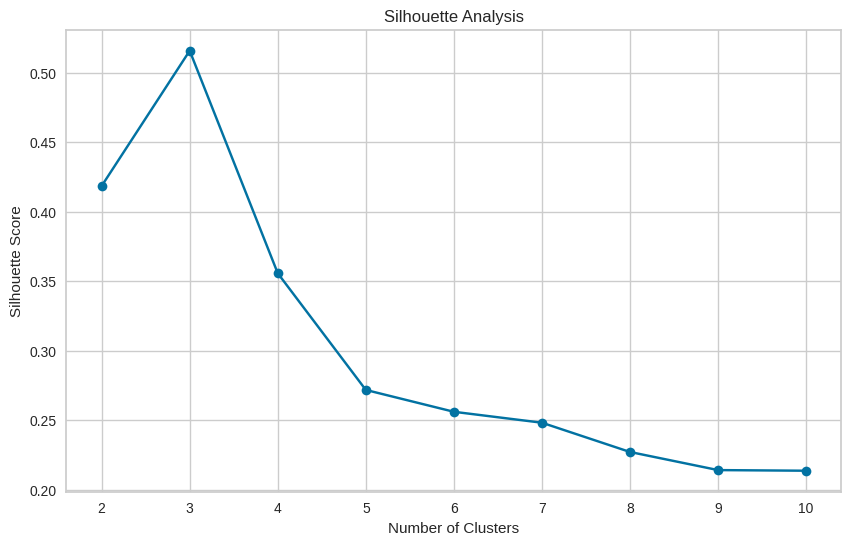

In [22]:
# Determine the optimal number of clusters using Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

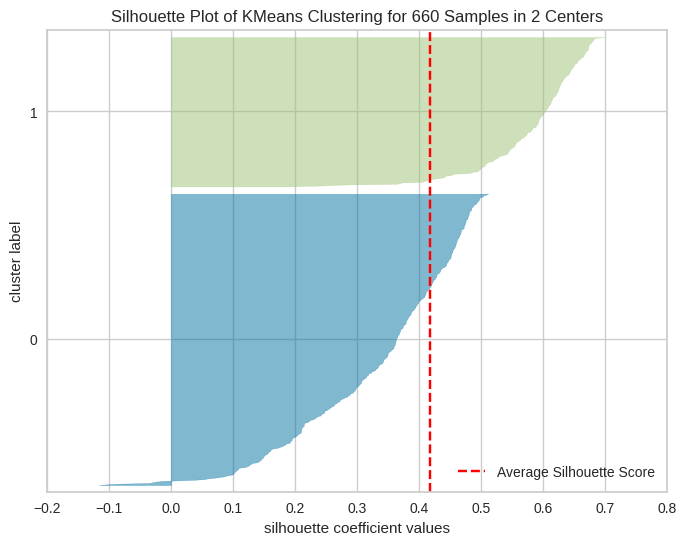

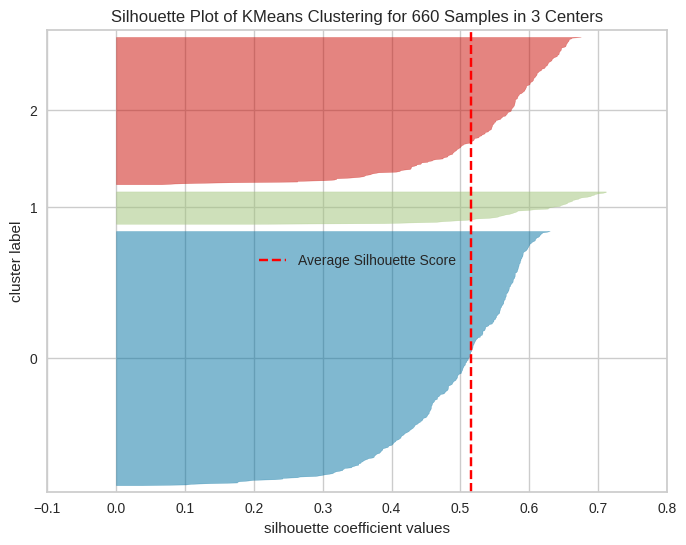

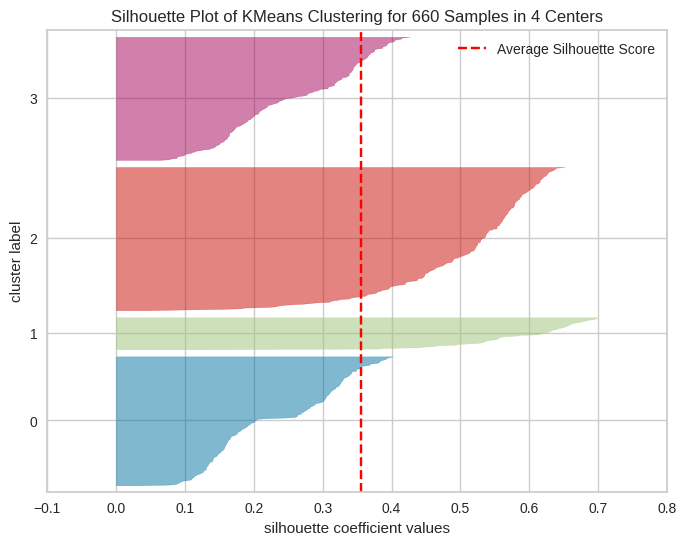

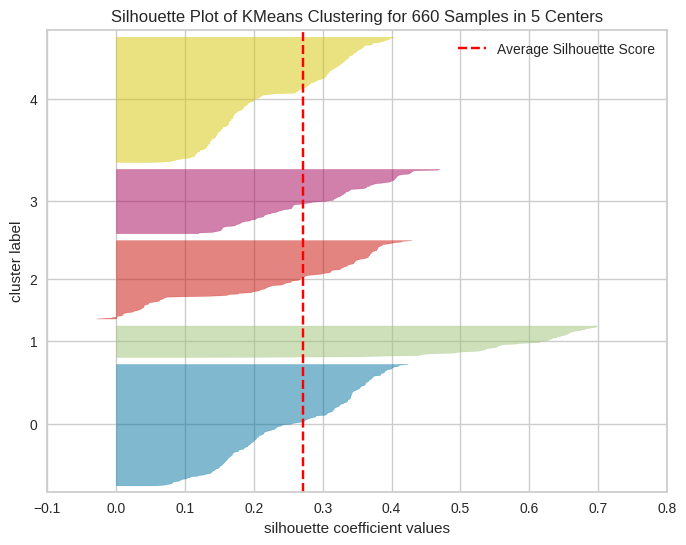

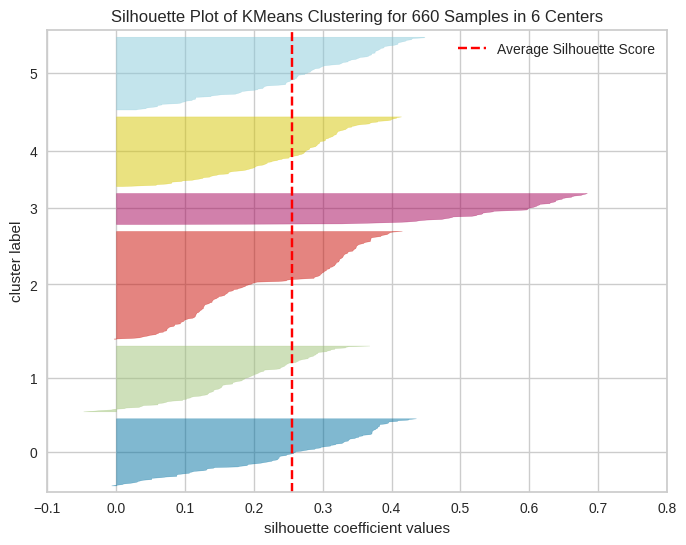

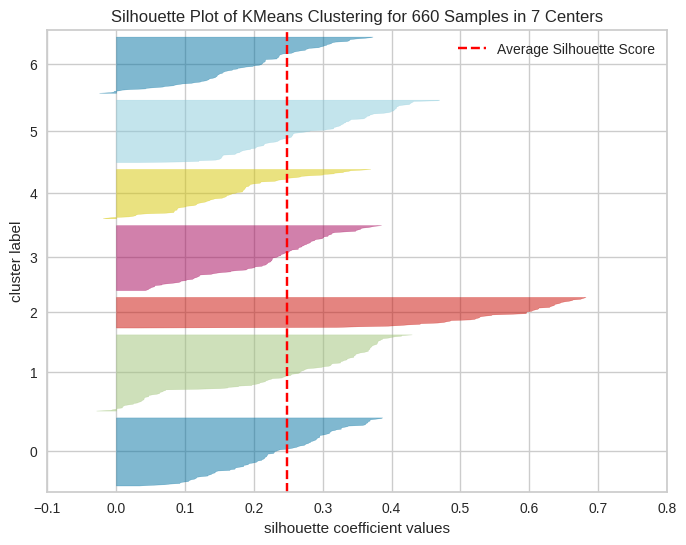

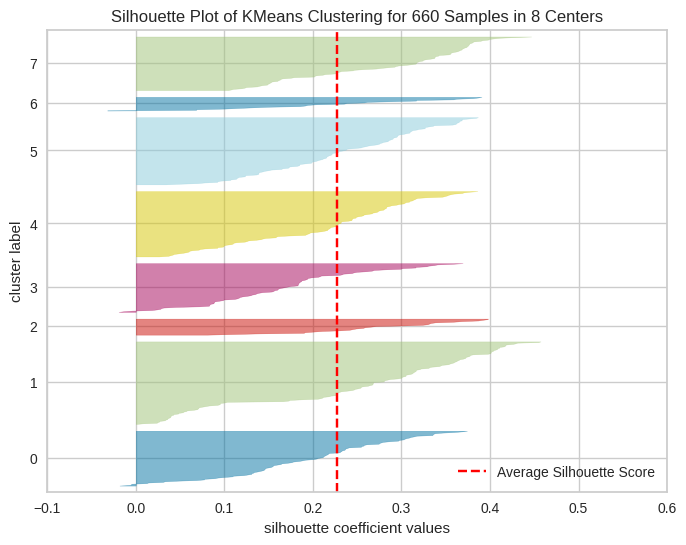

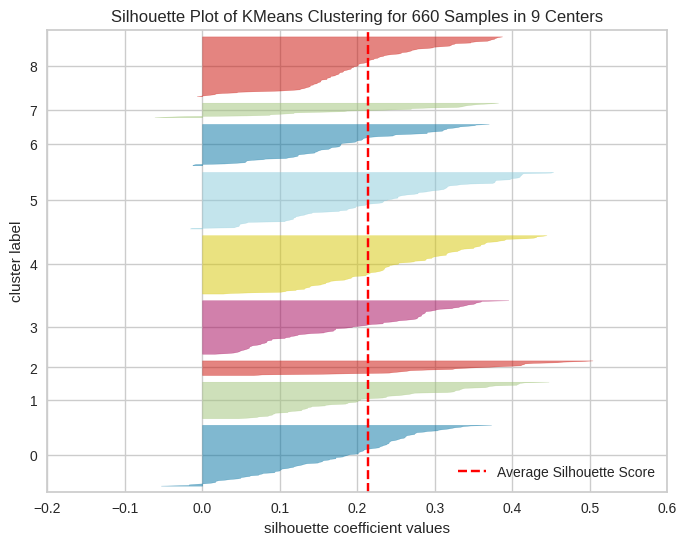

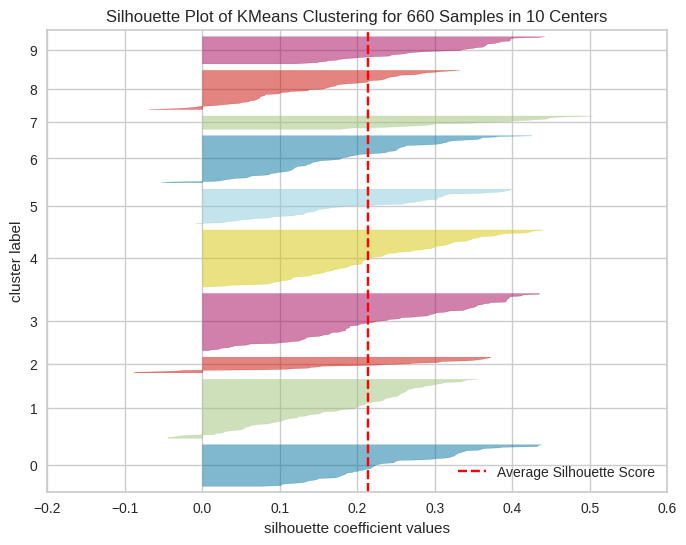

In [23]:
# Visualize silhouette scores for different number of clusters
for k in range(2, 11):
    plt.figure(figsize=(8, 6))
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

In [24]:
# Print the silhouette scores
print("Silhouette Scores:")
for i, score in enumerate(silhouette_scores):
    print(f"k = {i+2}: {score:.4f}")

Silhouette Scores:
k = 2: 0.4184
k = 3: 0.5157
k = 4: 0.3557
k = 5: 0.2717
k = 6: 0.2560
k = 7: 0.2482
k = 8: 0.2271
k = 9: 0.2141
k = 10: 0.2137


**Reasoning**:
Group the original data by the 3-cluster assignments and calculate the mean of each feature to understand the typical profile of customers in each cluster.

In [25]:
# Perform K-Means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(df_scaled)
df['Cluster_3'] = kmeans_3.labels_

# Perform K-Means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(df_scaled)
df['Cluster_4'] = kmeans_4.labels_

# Display the first few rows with cluster assignments
display(df.head())

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_3,Cluster_4
0,1,87073,100000,2,1,1,0,0,0
1,2,38414,50000,3,0,10,9,2,2
2,3,17341,50000,7,1,3,4,0,0
3,4,40496,30000,5,1,1,4,0,0
4,5,47437,100000,6,0,12,3,1,1


## Analyze Cluster Characteristics (3 Clusters)

### Subtask:
Analyze the characteristics of the clusters when using 3 clusters.

In [26]:
# Analyze characteristics of clusters with 3 clusters
cluster_analysis_3 = df.groupby('Cluster_3').agg({
    'Avg_Credit_Limit': 'mean',
    'Total_Credit_Cards': 'mean',
    'Total_visits_bank': 'mean',
    'Total_visits_online': 'mean',
    'Total_calls_made': 'mean'
}).reset_index()

display(cluster_analysis_3)

,Cluster_3,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,2,12174.107143,2.410714,0.933036,3.553571,6.870536


## Analyze Cluster Characteristics (4 Clusters)

### Subtask:
Analyze the characteristics of the clusters when using 4 clusters.

**Reasoning**:
Group the original data by the 4-cluster assignments and calculate the mean of each feature to understand the typical profile of customers in each cluster.

In [27]:
# Analyze characteristics of clusters with 4 clusters
cluster_analysis_4 = df.groupby('Cluster_4').agg({
    'Avg_Credit_Limit': 'mean',
    'Total_Credit_Cards': 'mean',
    'Total_visits_bank': 'mean',
    'Total_visits_online': 'mean',
    'Total_calls_made': 'mean'
}).reset_index()

display(cluster_analysis_4)

,Cluster_4,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,35904.522613,5.522613,2.477387,0.969849,2.075377
1,1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,2,12167.420814,2.393665,0.927602,3.574661,6.923077
3,3,31226.315789,5.478947,4.515789,1.010526,1.936842


## Visualize Cluster Characteristics

### Subtask:
Visualize the characteristics of the clusters using bar plots or other suitable visualizations.

**Reasoning**:
Create bar plots for each feature, grouped by cluster, to visually compare the cluster profiles and gain insights into their distinguishing characteristics.

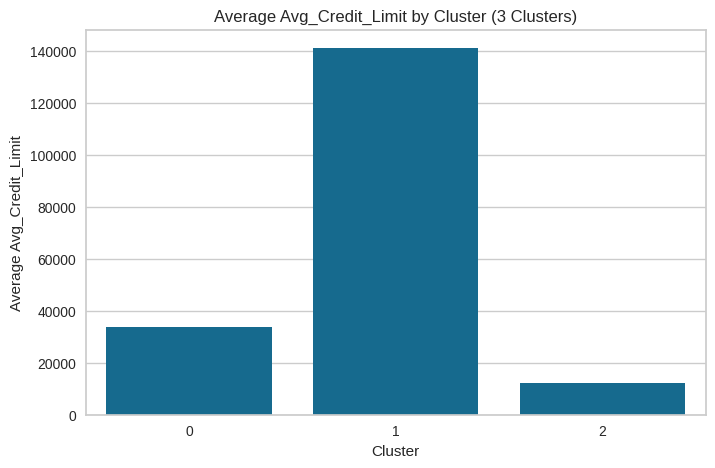

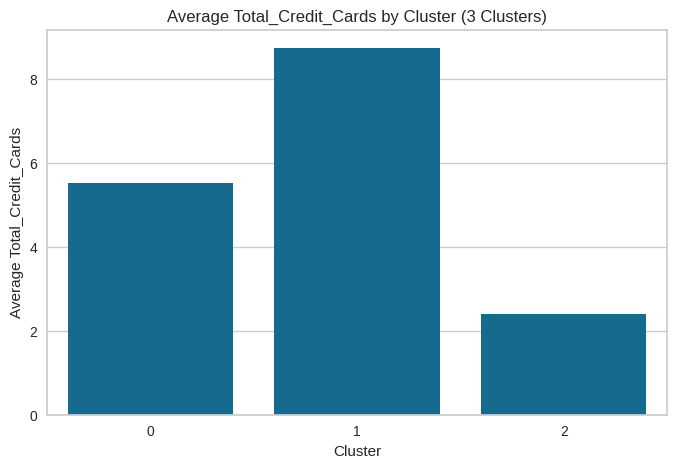

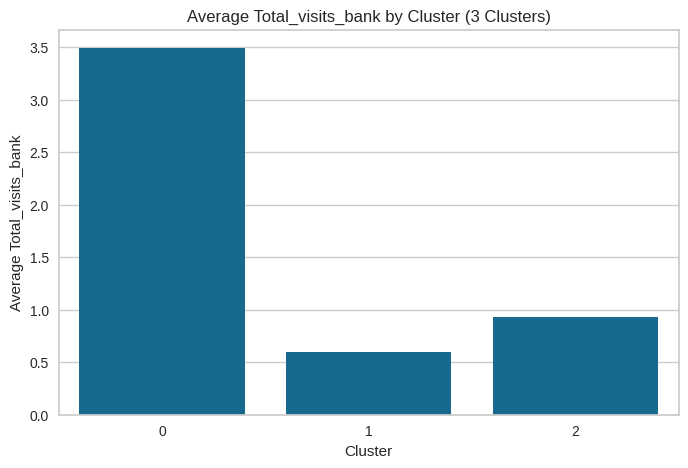

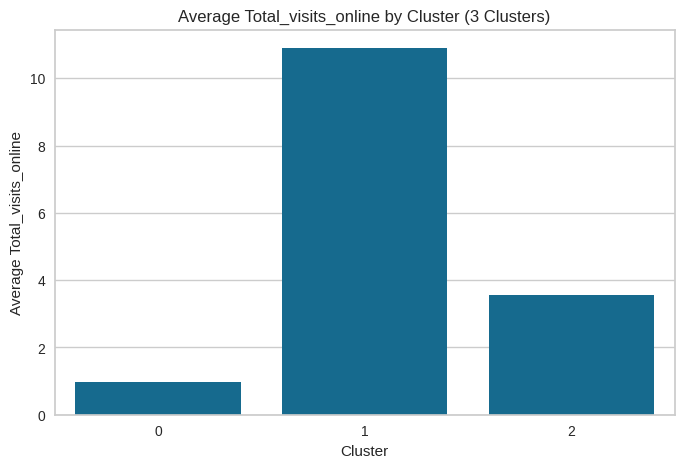

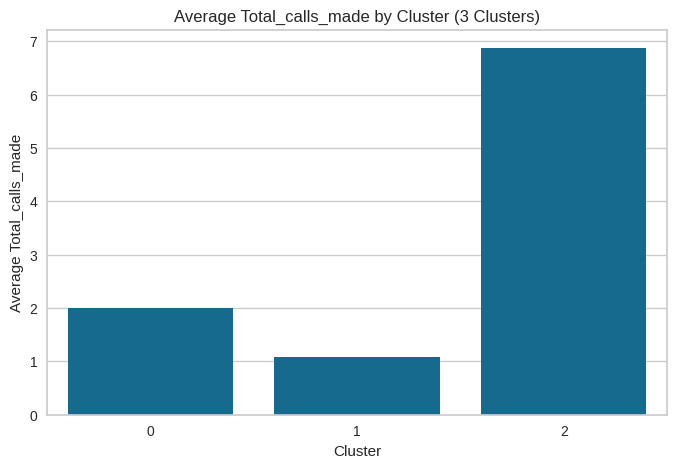

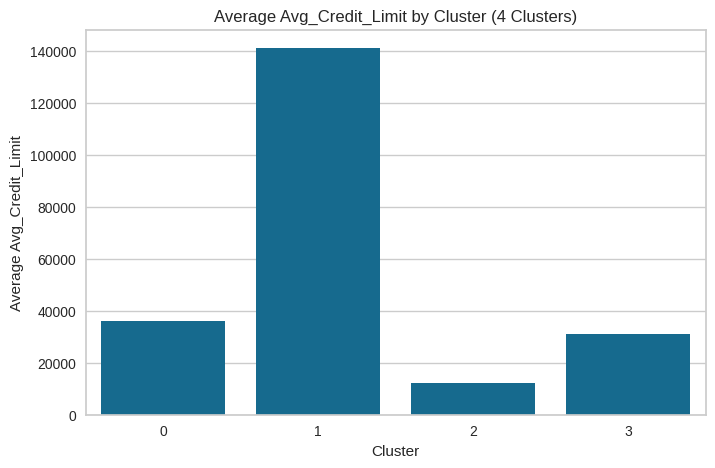

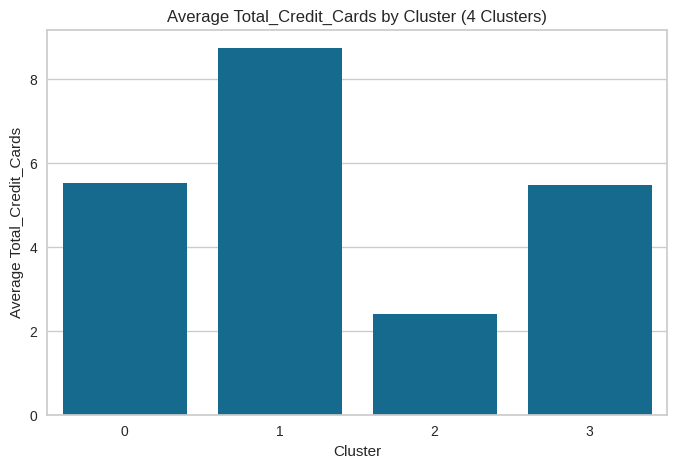

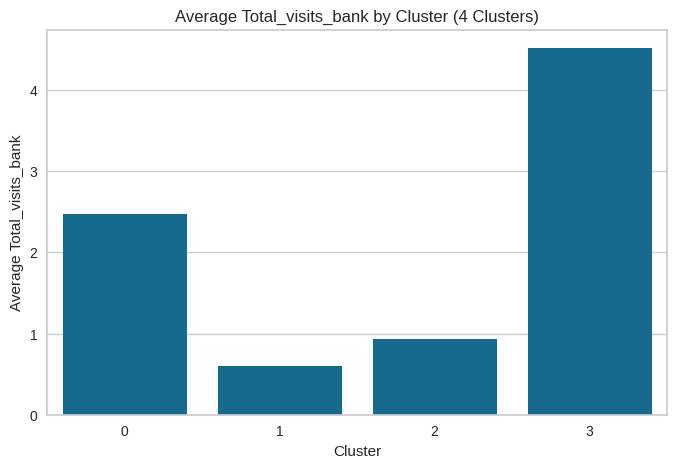

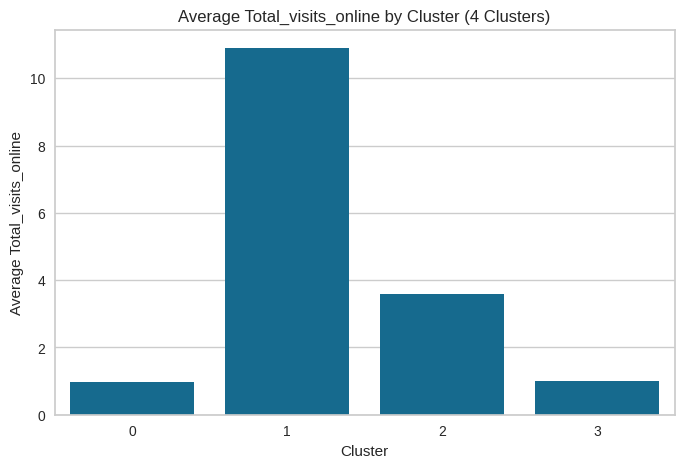

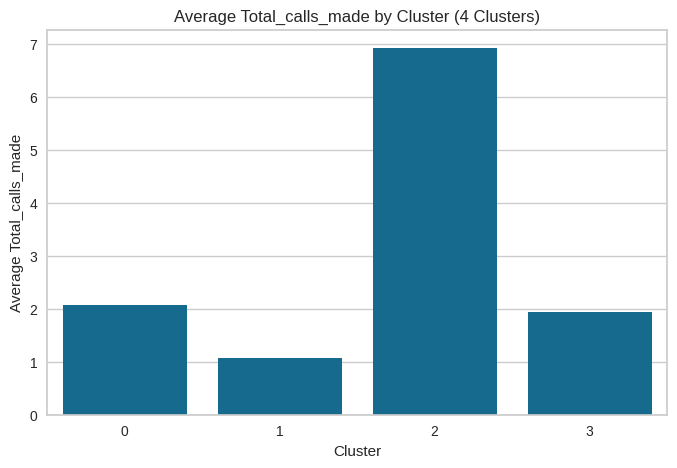

In [28]:
# Visualize cluster characteristics (3 Clusters)
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster_3', y=feature, data=cluster_analysis_3)
    plt.title(f'Average {feature} by Cluster (3 Clusters)')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.show()

# Visualize cluster characteristics (4 Clusters)
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster_4', y=feature, data=cluster_analysis_4)
    plt.title(f'Average {feature} by Cluster (4 Clusters)')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.show()

## Summary of Findings and Recommendations

Based on the K-Means clustering analysis with both 3 and 4 clusters, the following customer segments have been identified:

**3-Cluster Solution:**

*   **Cluster 0:** Customers with moderate credit limits and credit cards, preferring bank visits.
*   **Cluster 1:** High-value customers with high credit limits, many credit cards, and high online activity.
*   **Cluster 2:** Lower-value customers with low credit limits and credit cards, primarily using online and call channels.

**4-Cluster Solution:**

*   **Cluster 0:** Customers with moderate credit limits and credit cards, with moderate bank visits.
*   **Cluster 1:** High-value customers with high credit limits, many credit cards, and high online activity.
*   **Cluster 2:** Lower-value customers with low credit limits and credit cards, primarily using online and call channels.
*   **Cluster 3:** Customers with moderate credit limits and credit cards, with significantly higher bank visits.

**Recommendations:**

*   **High-Value Online Customers:** Target with personalized online offers for premium products and ensure a seamless online experience.
*   **Customers who Prefer Bank Visits:** Focus on in-branch promotions, personalized service, and potentially educational sessions on online services.
*   **Customers with Lower Credit Limits:** Provide educational content on credit building and responsible credit usage. Improve online and call center support.

The choice between 3 and 4 clusters depends on the desired level of granularity in customer segmentation.

## Perform Hierarchical Clustering

### Subtask:
Perform hierarchical clustering on the scaled data and visualize the dendrogram.

**Reasoning**:
Perform hierarchical clustering to explore the data's structure and visualize the dendrogram to help determine the optimal number of clusters and understand the relationships between clusters.

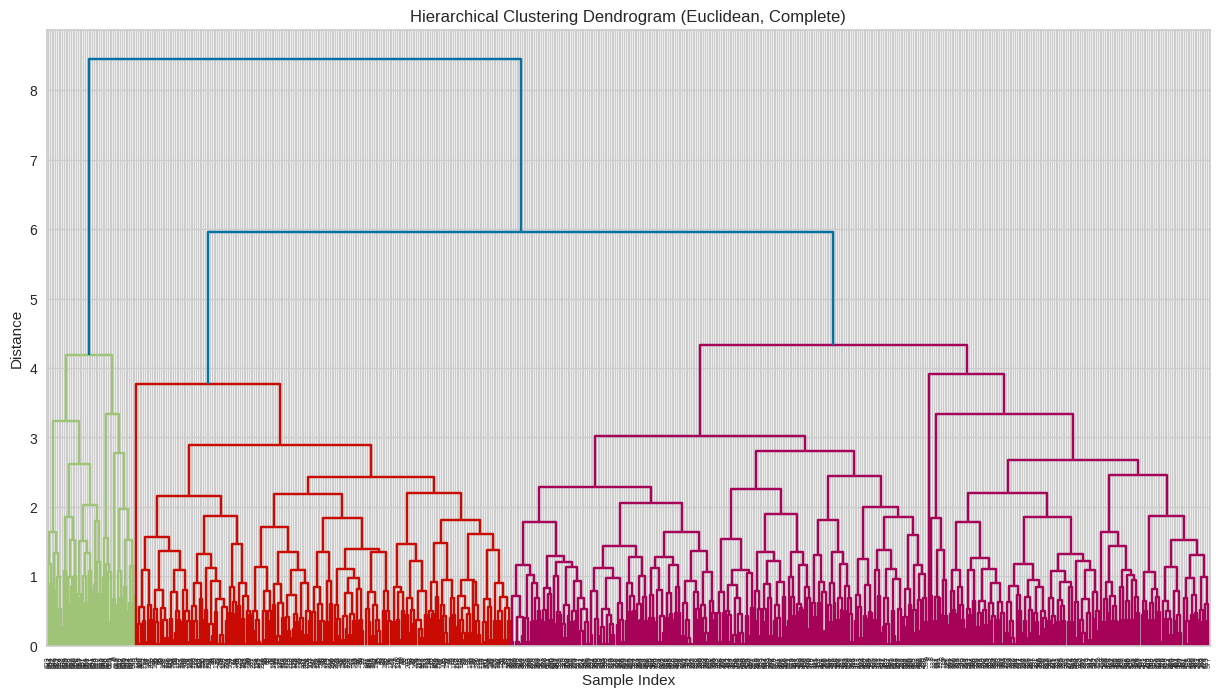

In [29]:
# Perform hierarchical clustering
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='decreasing',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Euclidean, Complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

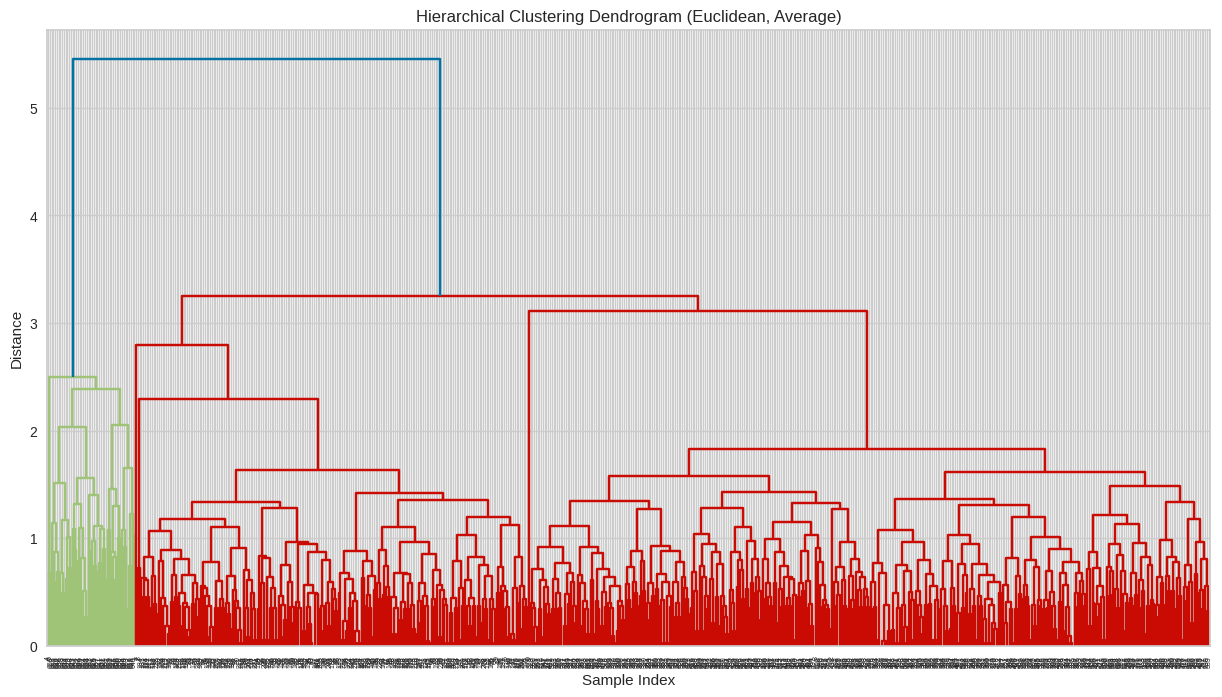

In [30]:
# Perform hierarchical clustering with Euclidean distance and Average linkage
linked_average_euclidean = linkage(df_scaled, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked_average_euclidean,
            orientation='top',
            distance_sort='decreasing',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Euclidean, Average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

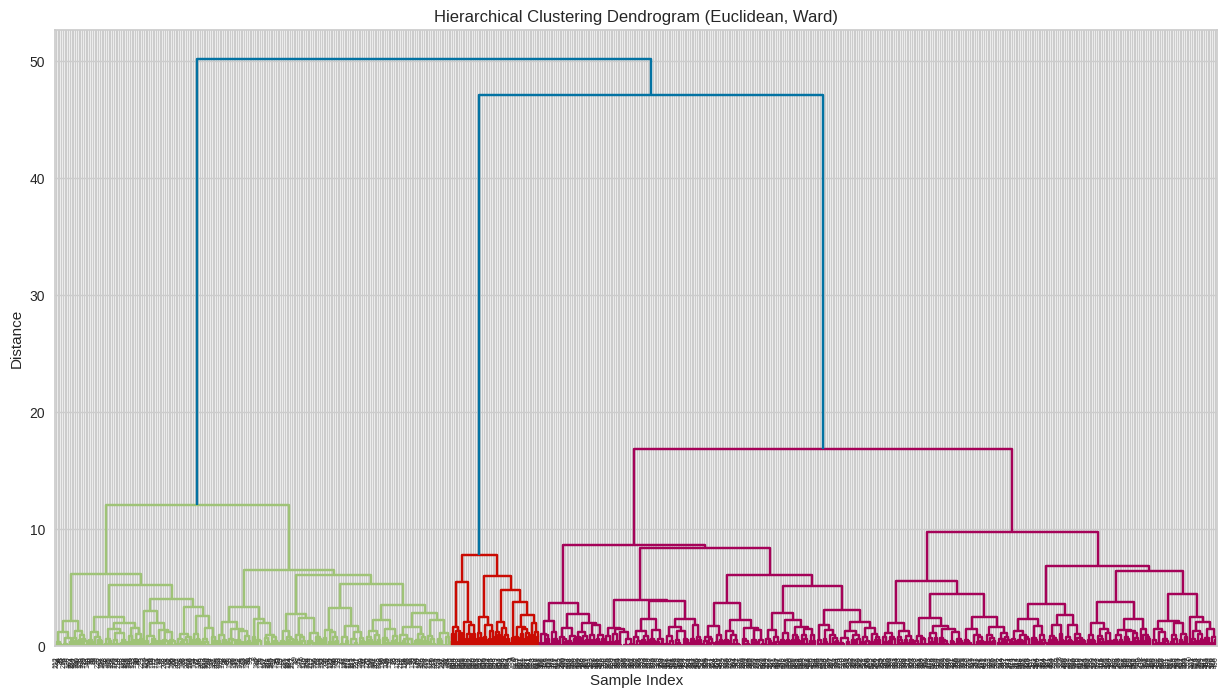

In [31]:
# Perform hierarchical clustering with Euclidean distance and Ward linkage
linked_ward_euclidean = linkage(df_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked_ward_euclidean,
            orientation='top',
            distance_sort='decreasing',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Euclidean, Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [32]:
# Calculate the cophenetic correlation coefficient
# We need the original pairwise distances
distance_matrix = pdist(df_scaled)

# Calculate the cophenetic correlation coefficient for Ward linkage
cophenetic_corr_ward = cophenet(linked_ward_euclidean, distance_matrix)

# Print the cophenetic correlation coefficient for Ward linkage
print(f"Cophenetic Correlation Coefficient (Ward): {cophenetic_corr_ward[0]:.4f}")

# Calculate the cophenetic correlation coefficient for Complete linkage
cophenetic_corr_complete = cophenet(linked, distance_matrix)

# Print the cophenetic correlation coefficient for Complete linkage
print(f"Cophenetic Correlation Coefficient (Complete): {cophenetic_corr_complete[0]:.4f}")

# Calculate the cophenetic correlation coefficient for Average linkage
cophenetic_corr_average = cophenet(linked_average_euclidean, distance_matrix)

# Print the cophenetic correlation coefficient for Average linkage
print(f"Cophenetic Correlation Coefficient (Average): {cophenetic_corr_average[0]:.4f}")

Cophenetic Correlation Coefficient (Ward): 0.7415
Cophenetic Correlation Coefficient (Complete): 0.8600
Cophenetic Correlation Coefficient (Average): 0.8977


In [33]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with n_clusters=4, linkage='complete', and metric='euclidean'
agg_clustering_4 = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
df['Agg_Cluster_4'] = agg_clustering_4.fit_predict(df_scaled)

# Display the first few rows with the new cluster assignments
display(df.head())

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_3,Cluster_4,Agg_Cluster_4
0,1,87073,100000,2,1,1,0,0,0,1
1,2,38414,50000,3,0,10,9,2,2,2
2,3,17341,50000,7,1,3,4,0,0,1
3,4,40496,30000,5,1,1,4,0,0,1
4,5,47437,100000,6,0,12,3,1,1,0


## Analyze Agglomerative Cluster Characteristics (4 Clusters)

### Subtask:
Analyze the characteristics of the clusters when using 4 clusters from Agglomerative Clustering.

**Reasoning**:
Group the original data by the 4-cluster assignments from Agglomerative Clustering and calculate the mean of each feature to understand the typical profile of customers in each cluster.

In [35]:
# Analyze characteristics of clusters with 4 clusters from Agglomerative Clustering
cluster_analysis_agg_4 = df.groupby('Agg_Cluster_4').agg({
    'Avg_Credit_Limit': 'mean',
    'Total_Credit_Cards': 'mean',
    'Total_visits_bank': 'mean',
    'Total_visits_online': 'mean',
    'Total_calls_made': 'mean'
}).reset_index()

display(cluster_analysis_agg_4)

,Agg_Cluster_4,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,141040.000000,8.740000,0.600000,10.900000,1.080000
1,1,29331.250000,5.350000,2.318750,1.006250,2.550000
2,2,12234.741784,2.352113,0.957746,3.633803,7.009390
3,3,35729.957806,5.535865,4.139241,1.012658,1.729958


In [37]:
# Highlight the top values in green within each column
def highlight_top(data, color='lightgreen'):
    '''
    Highlight the top values in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # DataFrame
        is_max = data == data.max()  # Highlight max in each column
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

display(cluster_analysis_agg_4.style.apply(highlight_top, axis=0))

,Agg_Cluster_4,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,141040.000000,8.740000,0.600000,10.900000,1.080000
1,1,29331.250000,5.350000,2.318750,1.006250,2.550000
2,2,12234.741784,2.352113,0.957746,3.633803,7.009390
3,3,35729.957806,5.535865,4.139241,1.012658,1.729958


## Compare K-Means and Agglomerative Clustering Results

Comparing the cluster characteristics from K-Means (with 3 and 4 clusters) and Agglomerative Clustering (with 4 clusters).

Based on the analysis of the cluster characteristics for K-Means (3 and 4 clusters) and Agglomerative Clustering (4 clusters), we can compare the segments identified by each method.

**Comparison of Cluster Profiles:**

*   **High Credit Limit / High Online Activity:** Both K-Means (Cluster 1 in both 3 and 4 solutions) and Agglomerative Clustering (Cluster 0) consistently identify a segment of customers with high average credit limits, a large number of credit cards, and high online activity. This appears to be a robust and well-defined segment across different clustering approaches.

*   **Low Credit Limit / High Calls/Online Visits:** Both K-Means (Cluster 2 in both 3 and 4 solutions) and Agglomerative Clustering (Cluster 2) identify a segment with low average credit limits and fewer credit cards, who tend to use online channels and make calls more frequently than visiting the bank. This segment is also consistently identified.

*   **Moderate Credit Limit / Bank Visits:** The remaining clusters show some variations. K-Means with 3 clusters identifies a segment (Cluster 0) with moderate credit limits and credit cards, who prefer bank visits. K-Means with 4 clusters splits this into two segments (Cluster 0 and Cluster 3) based on the frequency of bank visits. Agglomerative Clustering with 4 clusters identifies two clusters (Cluster 1 and Cluster 3) that seem to correspond to this general group of customers with moderate credit and a tendency for bank visits, though the exact profiles might differ slightly.

**Summary:**

Overall, both K-Means and Agglomerative Clustering identify similar core customer segments, particularly the high-value online customers and the lower-value customers who rely on online/call channels. The main differences lie in how the methods subdivide the customers with moderate credit limits and a preference for bank visits.

The choice of which clustering result to use (K-Means 3, K-Means 4, or Agglomerative 4) depends on the desired level of granularity and the specific business objectives. If a finer distinction among bank-visiting customers is important, the 4-cluster solutions might be more useful.